In [1]:
from quantum_galton_boards import *
import numpy as np 
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector

# QGB: n-layers

### The below code generates and runs a QGB with n-layers. The probabilities for each peg are equal such that p = 0.5.
### This code uses generate_qgb() with p = 0.5. For custom probabilities use generate_custom_qgb()

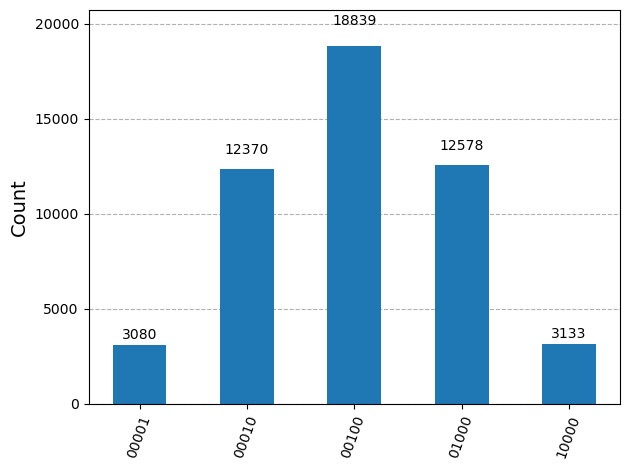

In [136]:
# number of layers 
n = 4

# create circuit
circuit = generate_qgb(n)

circuit.draw(output="mpl")

# run circuit 
# Backend selection
backend = Aer.get_backend('qasm_simulator')

# Executing the scheme on the selected backend
job = backend.run(circuit, shots=50000, memory=True)

# Get the result object
result = job.result()

# Get counts
counts = result.get_counts(circuit)

# Get the individual measurement outcomes in order
memory = result.get_memory(circuit)

# plot raw histogram 
plot_histogram(counts)

# save histogram
# hist = plot_histogram(counts)
# hist.savefig('histogram_normal.png')

## Post - processing

Text(0.5, 0, 'x')

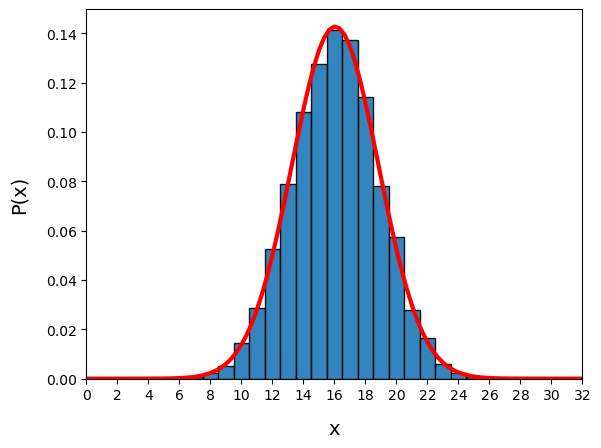

In [139]:
data = [s[::-1].index('1') for s in memory]

# mean and standard deviation of raw data
mean = np.mean(data)
std_dev = np.std(data, ddof=1) 

block_size = 8
sums = [sum(data[i:i+block_size]) for i in range(0, len(data), block_size)]

# mean and standard deviation of sums
new_mean = np.mean(sums)
new_std = np.std(sums, ddof=1)
max_num = 8*n

# Create figure and axis
fig, ax1 = plt.subplots()

# plot QGB simulation
ax1.hist(sums, bins = np.arange(-0.5, max_num+0.5, 1), edgecolor='black', alpha=0.9, density=True)

# set x ticks and lim
ax1.set_xlim([0, max_num])
ax1.set_xticks(np.arange(0,max_num+1,2))
ax1.set_xticklabels(np.arange(0,max_num+1,2), fontsize=10)

x = np.linspace(0,max_num+1,100)
y = normal_distribution(x, new_mean, new_std)

# plot gaussian distribution
ax1.plot(x, y, 'r', linewidth=3)

# set y lim
ax1.set_ylim(0, None)

# set x, y labels
ax1.set_ylabel('P(x)',fontsize=14, labelpad = 12)
ax1.set_xlabel('x',fontsize=14, labelpad = 12)

# save figure
# plt.savefig('normal_distribution.png', bbox_inches='tight')

# QGB: Exponential Distribution 
### The code below generates an exponential distribution using the function generate_custom_qgb()
### The additional argument thetas is a list of rotation angles corresponding to the left drop probabilities on each peg
### $[\theta_1, \theta_2, \theta_3]$ corresponds $[p_1,p_2,p_3]$ where $\theta_i = 2\arcsin(\sqrt{p_i})$
### Each peg is numbered from top to bottom, left to right.
### generate_thetas(n,p) creates the thetas required for an exponential distribution $\sim \lambda e^{-\lambda x}$
### $p = 1-e^{-\lambda/m}$ where $m$ chooses bucket size in defi

In [89]:
def generate_thetas(n,p):
    theta_p = 2*np.arcsin(np.sqrt(p))
    thetas = []
    for i in range(n):
        [thetas.append(np.pi) for i in range(i)]
        thetas.append(theta_p)
    return thetas

# number of layers 
n = 6

# lambda in exponential distribution
lam = 1.5
# chooses the size of each bucket
m = 4 

# left probabilitiy
p = 1 - np.exp(-lam/m)
thetas = generate_thetas(n,p)

# Generate circuit
new_circuit = generate_custom_qgb(n, thetas=thetas)

# run circuit 
# Backend selection
backend = Aer.get_backend('qasm_simulator', method="matrix_product_state")

# Executing the scheme on the selected backend
job = backend.run(new_circuit, shots=10000, memory=True)

# Get the result object
result = job.result()

# Get counts
counts = result.get_counts(new_circuit)

# Get the individual measurement outcomes in order
new_memory = result.get_memory(new_circuit)

# plot raw histogram 
plot_histogram(counts)

# save histogram
# hist = plot_histogram(counts)
# hist.savefig('histogram_exp_m_2.png')

# plot circuit
# new_circuit.draw(output="mpl")

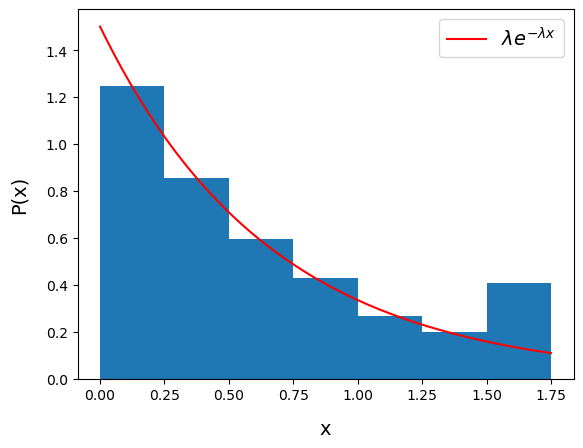

In [91]:
# post processing 

data = np.array([s[::-1].index('1') for s in new_memory])/m

# Create figure and axis
fig, ax1 = plt.subplots()

# plot QGB sim
ax1.hist(data, bins=np.arange(0,(n+1+1)/m,1/m), density=True)

# plot exponential distribution
x = np.linspace(0,(n+1)/m,100)
y = exponential_distribution(x, lam)
ax1.plot(x, y, 'r')

ax1.set_ylabel('P(x)',fontsize=14, labelpad = 12)
ax1.set_xlabel('x',fontsize=14, labelpad = 12)

plt.legend([r'$\lambda e^{-\lambda x}$'], loc='upper right', fontsize=14)
plt.savefig('comaprison_m_2.png', bbox_inches='tight')

# Increasing m gives a better approximation to the exponential at small x. 
# However, an overflow at end can occur when m is large. To fix this requires more layers, which is costly. 

# Hadamard Quantum Walk
### The code below generates a Hadamard Quantum Walk for n-layers using generate_hadamard_qgb()
### The parameter sym sets the initial ancilla state as $|\psi\rangle = \frac{|0\rangle+i|1\rangle}{2}$
### If false, initial state is $|0\rangle$

26


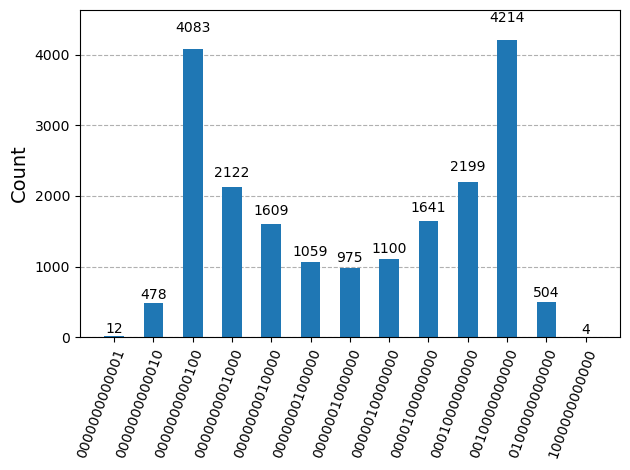

In [11]:
# number of layers 
n = 12

# create circuit
circuit = generate_hadamard_qgb(n, sym=True)

# run circuit 
# Backend selection
backend = Aer.get_backend('qasm_simulator')

# Executing the scheme on the selected backend
job = backend.run(circuit, shots=20000, memory=True)

# Get the result object
result = job.result()

# Get counts
counts = result.get_counts(circuit)

# Get the individual measurement outcomes in order
memory = result.get_memory(circuit)

# plot raw histogram 
plot_histogram(counts)

# save histogram
# hist = plot_histogram(counts)
# hist.savefig('histogram_hadamard_walk.png')

# draw circuit
# circuit.draw(output="mpl")

# Post processing
### The following code only compares distributions for sym = True and for $n$ between 1 and 12
### Uses data for the Quantum Hadamard Walk generated from 'https://quantumai.google/cirq/experiments/quantum_walks' using seven qubits and 10000 repeats

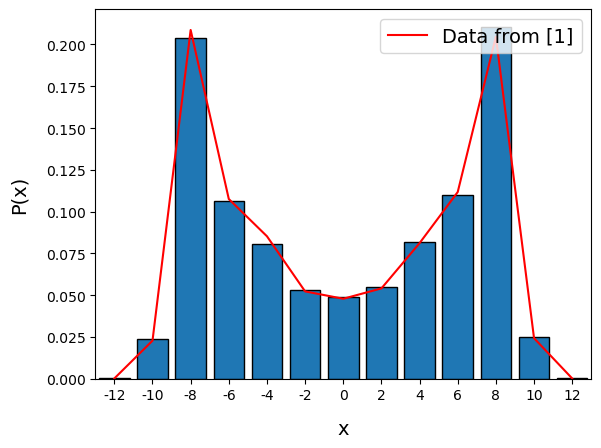

In [14]:
# the following code only compares for sym = True and for n between 1 and 14

# read in file data corresponding to n layers in QGB

from pathlib import Path

# path to data folder
data_folder = Path.cwd() / "data"

x_filename = 'x_iterations_' + str(n) + '.txt'
y_filename = 'y_iterations_' + str(n) + '.txt'

x_filepath = data_folder / x_filename
y_filepath = data_folder / y_filename

x = np.genfromtxt(x_filepath) 
y = np.genfromtxt(y_filepath)

# Create figure and axis
fig, ax1 = plt.subplots()

# transform data depending on n odd or even
if n % 2 == 0:
    data = np.array([s[::-1].index('1')-n/2 for s in memory])
    counts, bins = np.histogram(data, bins=np.arange(-(2*n+1)/2-0.5,(2*n+1)/2+0.5,1), density=True)
else:
    data = np.array([2*s[::-1].index('1')-n for s in memory])
    counts, bins = np.histogram(data, bins=np.arange(-n-1, n + 1.5, 1) , density=True)


# plot histogram of QGB data
ax1.bar(bins[:-1], counts, width=0.8, align='center', edgecolor='black')

ax1.set_ylabel('P(x)',fontsize=14, labelpad = 12)
ax1.set_xlabel('x',fontsize=14, labelpad = 12)

if n%2 == 0:
    ax1.set_xticks(np.arange(-n/2,n/2 + 1, 1))
    ax1.set_xticklabels(np.arange(-n, n + 1, 2))
    plt.xlim([-(n+1)/2,(n+1)/2])
else:
    ax1.set_xticks(np.arange(-n,n+1,2))
    plt.xlim(-n-1,n+1)

# plot data from QHW simualtion (see notes above)
ax1.plot(x,y, 'r')

# plot legend
plt.legend([r'Data from [1]'], loc='upper right', fontsize=14)

# save figure
# plt.savefig('hadamard_walk_comp.png', bbox_inches='tight')